In [1]:
import heeps
from heeps.wavefront.get_array import show_wf
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files')))
apo_misalign = 0.05
conf = dict(
    ngrid = 2048,
    hfov = 0.8,
    add_phase = False,
    nframes = 1,
    apo_misalign = [apo_misalign, 0],
)

In [3]:
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(**conf, verbose=True)
wf = heeps.pupil.pupil(**conf)
peak = np.max(heeps.wavefront.propagate(wf, onaxis=False, **conf))
print('\npeak =', peak)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=2048, diam_norm=1.0838, beam_ratio=0.2572
   ravc_calc=False, ravc_t=0.7909, ravc_r=0.5190
   npupil=571, pscale=5.4700 mas, lam=3.8045E-06 m
   hfov=0.8 arcsec (-> ndet=293, 37.69 lam/D)

   2022-06-29 00:42:24, e2e simulation using 12 cores
   2022-06-29 00:42:28, completed in 4.1 seconds

peak = 0.010542152781607743


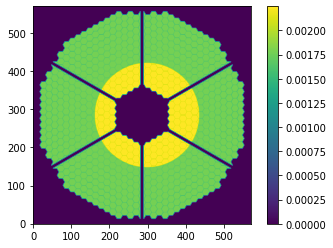

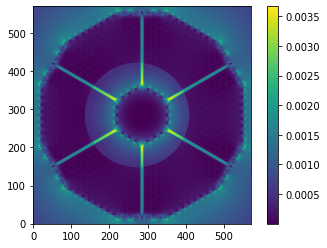

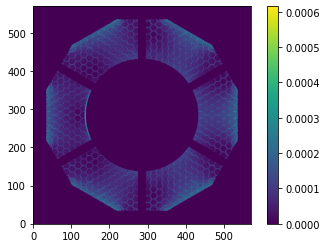

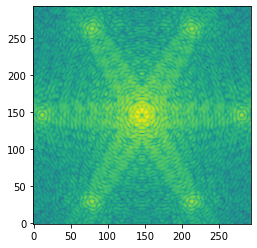

In [4]:
wf = heeps.pupil.pupil(**conf)
wf = heeps.optics.apodizer(wf, **conf)
plt.figure(); apo = show_wf(wf, 'amp', npupil=conf['npupil'])
wf = heeps.optics.fp_mask(wf, **conf)
plt.figure(); before_ls = show_wf(wf, 'amp', npupil=conf['npupil'])
wf = heeps.optics.lyot_stop(wf, **conf)
plt.figure(); after_ls = show_wf(wf, 'amp', npupil=conf['npupil'])
psf = heeps.optics.detector(wf, **conf)
psf /= peak
plt.figure(); plt.imshow(np.log10(psf), origin='lower')
fits.writeto('pupil/apo_misalign_pupil%s.fits'%apo_misalign, apo, overwrite=True)
fits.writeto('pupil/apo_misalign_before_ls%s.fits'%apo_misalign, before_ls, overwrite=True)
fits.writeto('pupil/apo_misalign_after_ls%s.fits'%apo_misalign, after_ls, overwrite=True)
fits.writeto('pupil/apo_misalign_psf%s.fits'%apo_misalign, psf, overwrite=True)